In [1]:
# QUELS USAGES DU PORTAIL DE LA MÉDIATHÈQUE ?

import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from kiblib.utils import lucas_sns_params

from kiblib.utils.db import DbConn

db_conn = DbConn().create_engine()

query = """SELECT *
FROM statdb.stat_web2 sw 
WHERE YEAR(`date`) >= 2019"""

web = pd.read_sql(query,db_conn)
#web

In [3]:
web['date'] = pd.to_datetime(web['date'])
web['annee'] = pd.DatetimeIndex(web['date']).year
web['semaine'] = web['date'].dt.isocalendar().week

In [4]:
web_thisyear = web[web['annee']==dt.today().year]

In [5]:
web_thisyear = web_thisyear.groupby('semaine')['visites'].sum().reset_index()

In [7]:
semaine_max = web_thisyear['semaine'].max()
semaine_min = semaine_max - 4

In [8]:
web_4lastweek = web[web['semaine'].between(semaine_min,semaine_max)]

In [14]:
web_4lastweek = web_4lastweek.groupby(['annee','semaine'])['visites'].sum().reset_index()

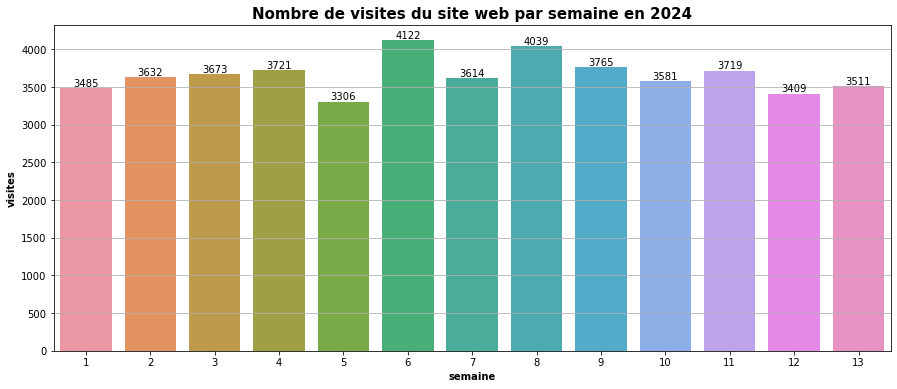

In [24]:
ax = sns.barplot(data=web_thisyear,x='semaine',y='visites')
ax.set_title(f"Nombre de visites du site web par semaine en {dt.today().year}")
for i in ax.containers:
    ax.bar_label(i,)


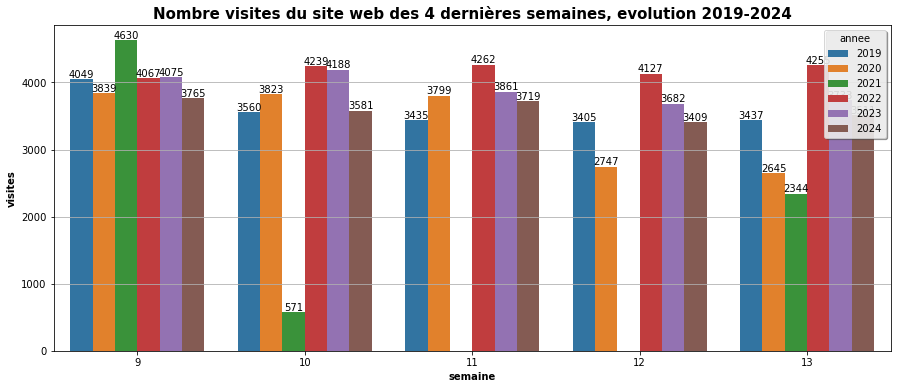

In [22]:
ax = sns.barplot(data=web_4lastweek,x='semaine',y='visites',hue='annee',ci=None)
ax.set_title(f"Nombre visites du site web des 4 dernières semaines, evolution 2019-{dt.today().year}")
for i in ax.containers:
    ax.bar_label(i,)

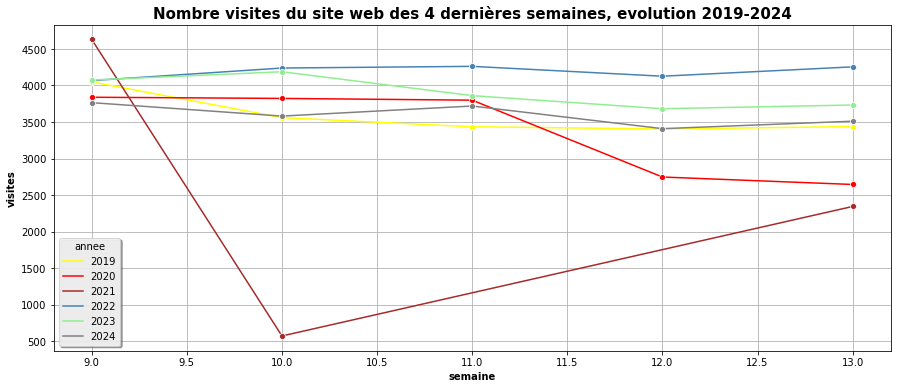

In [51]:
liste_couleurs = ['yellow','red','brown','steelblue','lightgreen','grey']
liste_markers = ("o")
ax = sns.lineplot(data=web_4lastweek,
                  x='semaine',
                  y='visites',hue='annee',
                  ci=None,palette=liste_couleurs,dashes=True,
                  marker=liste_markers)
ax.set_title(f"Nombre visites du site web des 4 dernières semaines, evolution 2019-{dt.today().year}")
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

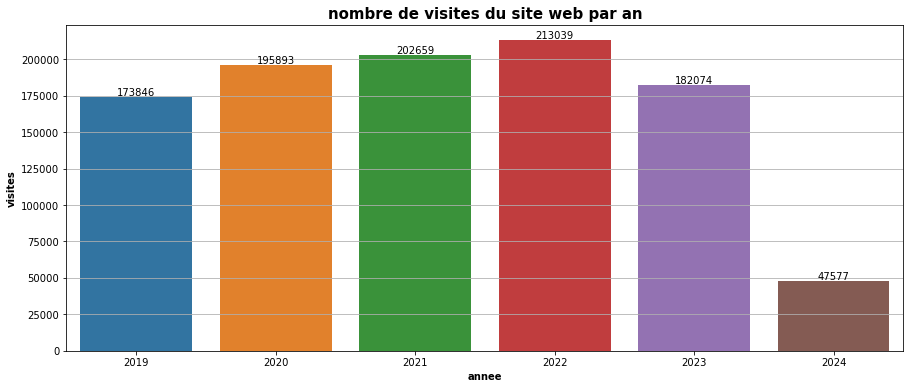

In [23]:
ax = sns.barplot(data=web.groupby('annee')['visites'].sum().reset_index(),x='annee',y='visites')
ax.set_title(f"nombre de visites du site web par an")
for i in ax.containers:
    ax.bar_label(i,)